# <center>Задача 4.14<center>
# <center>Афанасьев Виталий, 610 группа<center>

# Условие задачи

### Вычислить и сравнить спектры следующих прямоугольных импульсов:
###   $$
        \xi_1(t) = 
         \begin{cases}
           a & |t| < \frac{\tau}{2}\\
           0 & |t| > \frac{\tau}{2}
         \end{cases},
         \quad \xi_2(t) = \xi_1(t-\frac{\tau}{2}),
         \quad \xi_3(t) = \xi_1(t-t_0)
    $$
###    Изобразить мнимые и действительные части спектров этих импульсов, а также спектральные плотности энергиии.

# Вычисление спектра сигнала и спектральной плотности

### Спектр:
### $$ S(\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty}\xi(t)e^{-i\omega t}dt = \frac{a}{2\pi}\int_{-\frac{\tau}{2}}^{\frac{\tau}{2}}e^{-i\omega t}dt =\\
        = \frac{a}{2\pi i\omega}(e^{i\omega\tau} - e^{-i\omega\tau}) = \frac{a}{\pi\omega}\sin\omega\frac{\tau}{2}
$$
### Теорема запаздывания:
### $$
    \xi(t-t_0) = S(\omega) e^{-i\omega t} = S(\omega)(\cos\omega t - i\sin\omega t)
$$
### Спектральная плотность:
### $$
    G(\omega) = 2\pi|S(\omega)|^2 = \frac{2a^2}{\pi\omega^2}\sin^2 \omega\frac{\tau}{2}
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rc('font', size=20)

In [3]:
t = np.linspace(-10, 10, 1000)
tau = 2
a = 1
t0 = 3
omega = np.linspace(-20, 20, 1000)

In [4]:
def xi_1(t):
    return a if abs(t) < tau/2 else 0


def s_1(omega):
    return a * np.sin(omega * tau / 2) / (np.pi * omega)


def xi_2(t):
    return xi_1(t-tau/2)


def s_2(omega):
    return a * np.sin(omega * tau / 2) * (np.cos(omega*tau/2) - 1j*np.sin(omega*tau/2)) / (np.pi * omega)


def xi_3(t):
    return xi_1(t-t0)


def s_3(omega):
    return a * np.sin(omega * tau / 2) * (np.cos(omega*t0) - 1j*np.sin(omega*t0)) / (np.pi * omega)


def g(omega):
    return 2* a**2 * np.sin(omega * tau / 2)**2 / (np.pi * omega**2)

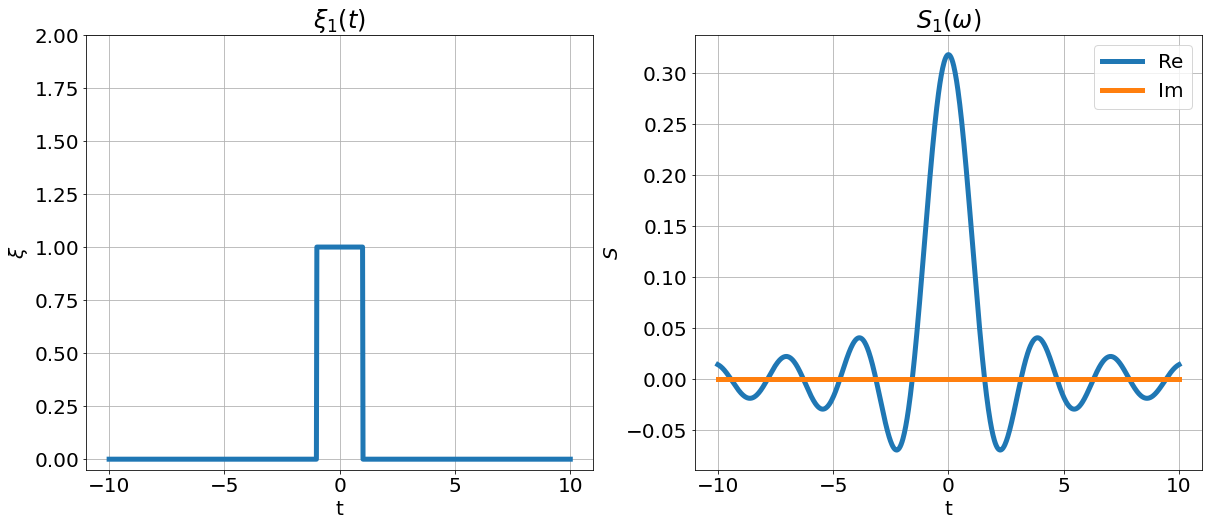

In [5]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title(r"$\xi_1(t)$")
plt.ylabel(r"$\xi$")
plt.xlabel(r"t")
plt.plot(t, list(map(xi_1, t)), linewidth=5)
plt.ylim(-0.05, 2*a)
plt.grid()


plt.subplot(1, 2, 2)
plt.title(r"$S_1(\omega)$")
plt.ylabel(r"$S$")
plt.xlabel(r"t")
plt.plot(t, np.array(list(map(s_1, omega))).real, linewidth=5)
plt.plot(t, np.array(list(map(s_1, omega))).imag, linewidth=5)
plt.legend(["Re", "Im"])
plt.grid()

plt.show()

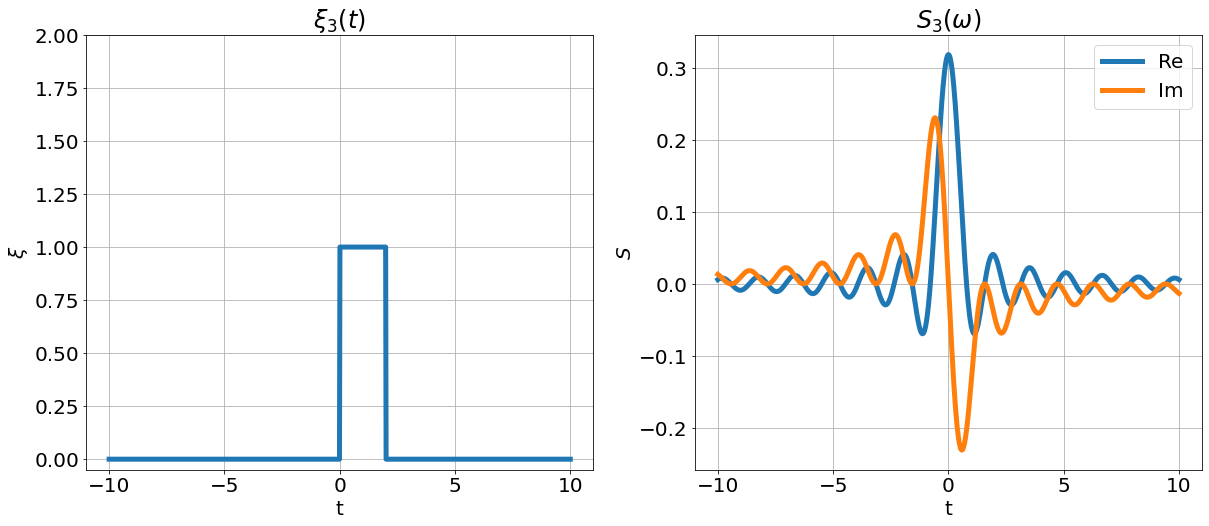

In [6]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title(r"$\xi_3(t)$")
plt.ylabel(r"$\xi$")
plt.xlabel(r"t")
plt.plot(t, list(map(xi_2, t)), linewidth=5)
plt.ylim(-0.05, 2*a)
plt.grid()


plt.subplot(1, 2, 2)
plt.title(r"$S_3(\omega)$")
plt.ylabel(r"$S$")
plt.xlabel(r"t")
plt.plot(t, np.array(list(map(s_2, omega))).real, linewidth=5)
plt.plot(t, np.array(list(map(s_2, omega))).imag, linewidth=5)
plt.legend(["Re", "Im"])
plt.grid()

plt.show()

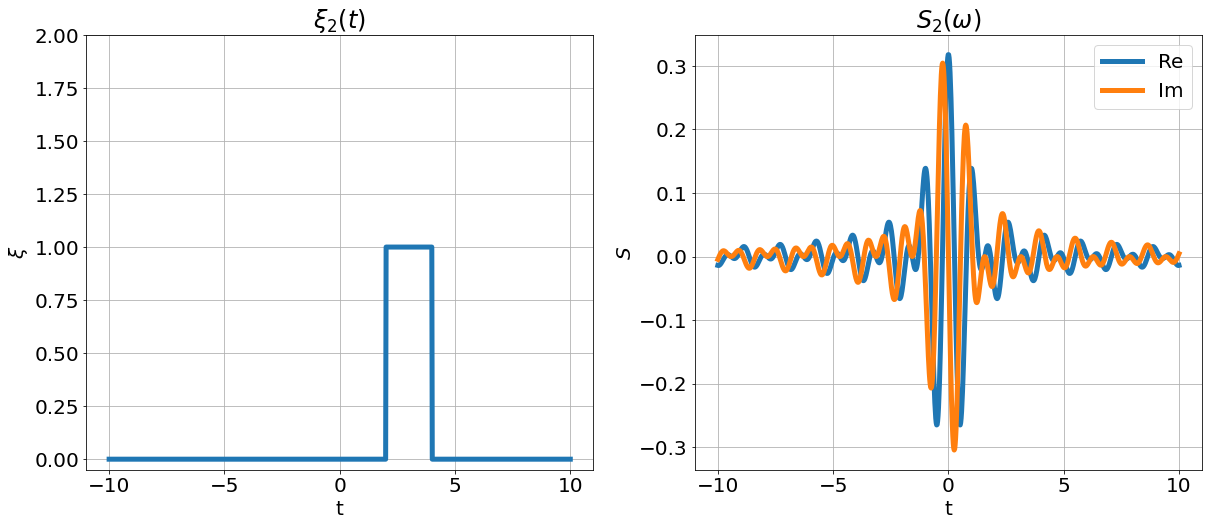

In [7]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title(r"$\xi_2(t)$")
plt.ylabel(r"$\xi$")
plt.xlabel(r"t")
plt.plot(t, list(map(xi_3, t)), linewidth=5)
plt.ylim(-0.05, 2*a)
plt.grid()


plt.subplot(1, 2, 2)
plt.title(r"$S_2(\omega)$")
plt.ylabel(r"$S$")
plt.xlabel(r"t")
plt.plot(t, np.array(list(map(s_3, omega))).real, linewidth=5)
plt.plot(t, np.array(list(map(s_3, omega))).imag, linewidth=5)
plt.legend(["Re", "Im"])
plt.grid()

plt.show()

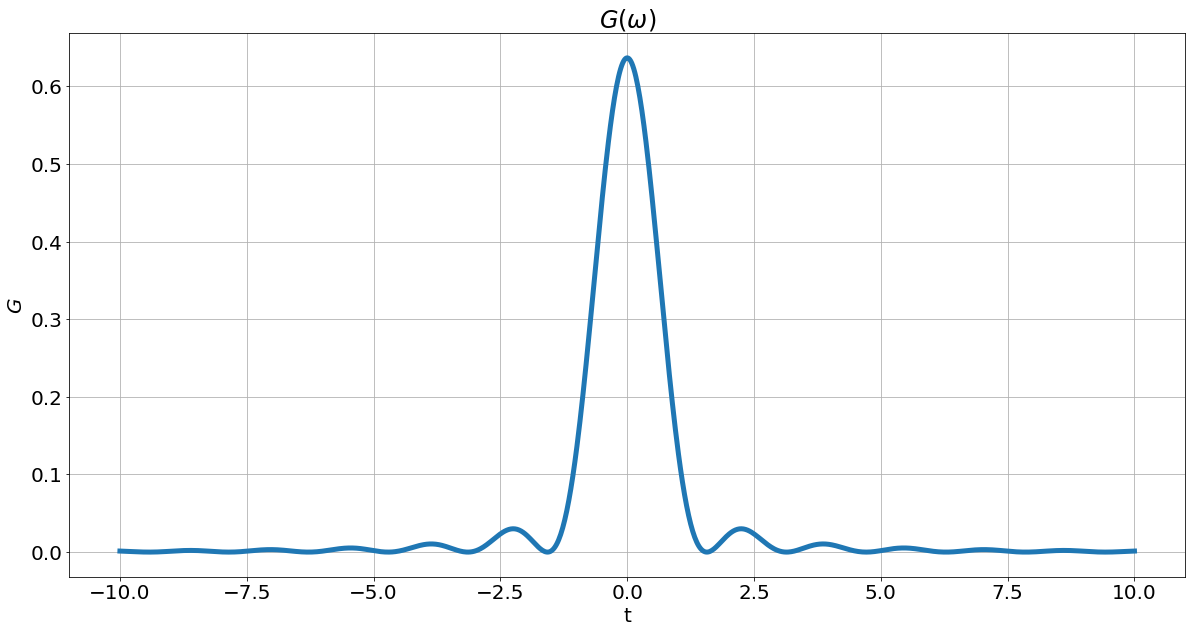

In [8]:
plt.figure(figsize=(20,10))
plt.title(r"$G(\omega)$")
plt.ylabel(r"$G$")
plt.xlabel(r"t")
plt.plot(t, np.array(list(map(g, omega))).real, linewidth=5)
plt.grid()